In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Checking the basic details of the dataset

In [5]:
data.shape

(891, 11)

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

Age,cabin and Embarked have missing values

# Handling missing value in Age

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling missing values in Embarked

In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# Handling missing values in cabin

In [11]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)

data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Checking the outliers in the columns

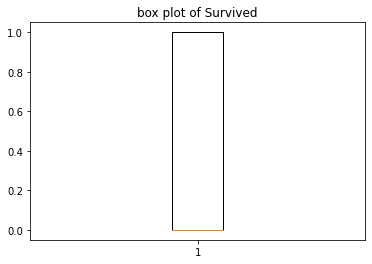

In [12]:
plt.boxplot(data['Survived'])
plt.title('box plot of Survived')
plt.show()

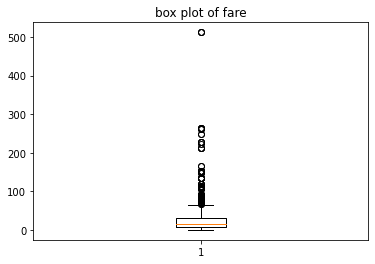

In [13]:
plt.boxplot(data['Fare'])
plt.title('box plot of fare')
plt.show()

In [15]:
Q1=np.percentile(data['Fare'],25, interpolation='midpoint')
Q2=np.percentile(data['Fare'],50, interpolation='midpoint')
Q3=np.percentile(data['Fare'],75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [16]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [17]:
outlier=[]
for i in data['Fare']:
    if((i>up_lim) or (i<low_lim)):
        outlier.append(i)
print(outlier)        

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [18]:
ind1=data['Fare']>up_lim
c=data.loc[ind1].index
data.drop(c,inplace=True)

In [19]:
ind2=data['Fare']<low_lim
d=data.loc[ind2].index
data.drop(d,inplace=True)

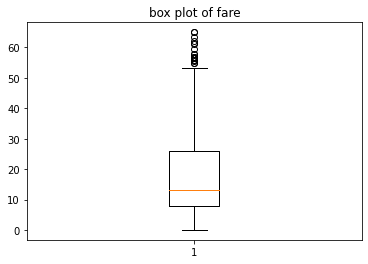

In [20]:
plt.boxplot(data['Fare'])
plt.title('box plot of fare')
plt.show()


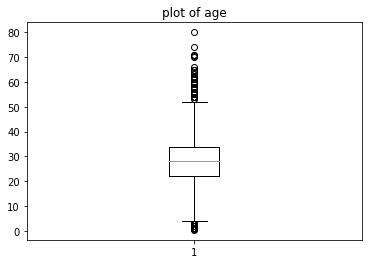

In [21]:
plt.boxplot(data['Age'])
plt.title('plot of age')
plt.show()


In [22]:
Q1=np.percentile(data['Age'],25, interpolation='midpoint')
Q2=np.percentile(data['Age'],50, interpolation='midpoint')
Q3=np.percentile(data['Age'],75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [23]:
IQR=Q3-Q1

In [24]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

4.0
52.0


In [25]:
outlier=[]
for i in data['Age']:
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)
print(outlier)  

[54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [26]:
ind1=data['Age']>up_lim
a=data.loc[ind1].index
data.drop(a,inplace=True)
ind2=data['Age']<low_lim
b=data.loc[ind2].index
data.drop(b,inplace=True)

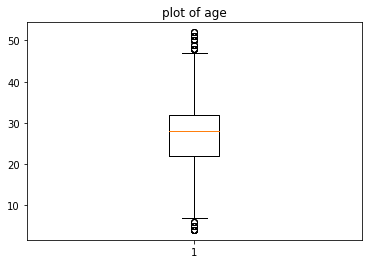

In [27]:
plt.boxplot(data['Age'])
plt.title('plot of age')
plt.show()

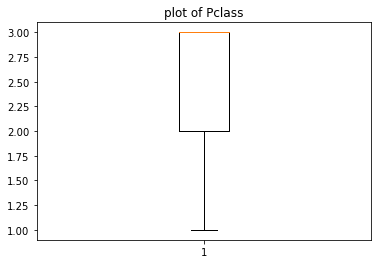

In [28]:
plt.boxplot(data['Pclass'])
plt.title('plot of Pclass')
plt.show()

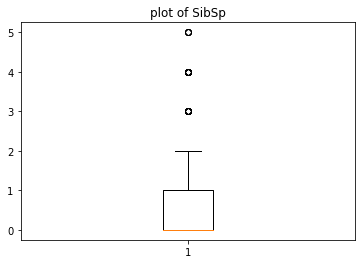

In [29]:
plt.boxplot(data['SibSp'])
plt.title('plot of SibSp')
plt.show()


In [30]:
Q1=np.percentile(data['SibSp'],25, interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50, interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [31]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [32]:
outlier=[]
for i in data['SibSp']:
    if((i>up_lim) or (i<low_lim)):
        outlier.append(i)
print(outlier)   

[3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


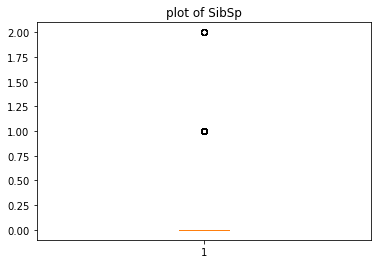

In [33]:
ind1=data['SibSp']>up_lim
a=data.loc[ind1].index
data.drop(a,inplace=True)
ind2=data['SibSp']<low_lim
b=data.loc[ind2].index
data.drop(b,inplace=True)
plt.boxplot(data['SibSp'])
plt.title('plot of SibSp')
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [35]:
a1=data.drop(['Survived','Name'],axis=1)

In [36]:
a1=pd.get_dummies(a1)
a1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110465,Ticket_110564,Ticket_111320,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,3,28.0,0,0,8.4583,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
col=a1.columns

In [39]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
a1 = min_max.fit_transform(a1)

a1=pd.DataFrame(a1)
a1.columns=col
a1.describe()

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,675
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.512849,0.132893,0.044787,0.255243,0.312775,0.687225,0.002937,0.001468,0.001468,...,0.002937,0.001468,0.004405,0.001468,0.001468,0.004405,0.001468,0.151248,0.099853,0.748899
std,0.360886,0.189117,0.247705,0.125542,0.204008,0.463964,0.463964,0.054153,0.038320,0.038320,...,0.054153,0.038320,0.066275,0.038320,0.038320,0.066275,0.038320,0.358554,0.300024,0.433965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.000000,0.000000,0.120834,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,0.000000,0.000000,0.161538,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.604167,0.000000,0.000000,0.357692,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
